In [1]:
#LOAD CLEANED RFM DATASET

import pandas as pd

rfm = pd.read_excel(r"../data/processed/rfm_table.xlsx")
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346,165,11,372.86
1,12347,3,2,1323.32
2,12348,74,1,222.16
3,12349,43,3,2671.14
4,12351,11,1,300.93


In [ ]:
#PREPARE DATA FOR CLUSTERING

#1.1 REMOVE CUSTOMER ID BC IT'S NOT NEEDED FOR CLUSTERING
rfm_for_clustering = rfm[['Recency', 'Frequency', 'Monetary']].copy()


In [ ]:
#APPLY LOG TRANSFORMATION BC RFM VARIABLES ARE USUALLY EXTREMELY SKEWED
import numpy as np

rfm_log = np.log1p(rfm_for_clustering)
rfm_log.head()


,Recency,Frequency,Monetary
0,5.111988,2.484907,5.923881
1,1.386294,1.098612,7.188654
2,4.317488,0.693147,5.407889
3,3.784190,1.386294,7.890635
4,2.484907,0.693147,5.710195


In [ ]:
#SCALE THE DATA/!!!!!!!
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_log)


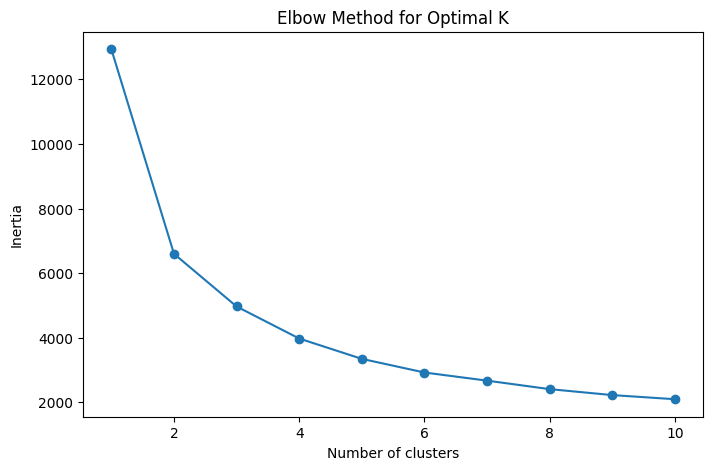

In [ ]:
#FIND BEST NUMBER OF CLUSTERS (K) - ELBOW METHOD

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#FIT THE K-MEANS MODEL (ASSUMING K=4)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

rfm['Cluster'] = kmeans.labels_


In [ ]:
#ANALYZE CLUSTER CENTERS - GET THE ACTUAL CLUSTER PROFILES

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers = np.expm1(cluster_centers)   # reverse log

cluster_profile = pd.DataFrame(cluster_centers, 
                               columns=['Recency', 'Frequency', 'Monetary'])

cluster_profile.round(2)


,Recency,Frequency,Monetary
0,58.84,3.97,1458.43
1,163.21,1.26,244.83
2,18.75,1.80,428.21
3,8.26,10.85,4045.89


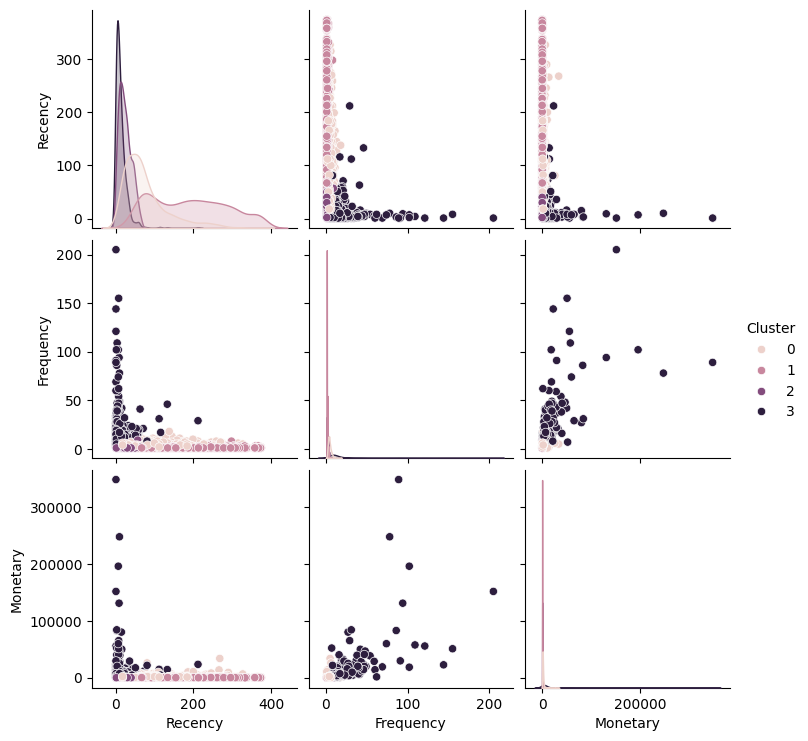

In [8]:
#VISUALIZE CLUSTERS - HOW CLUSTERS SEPERATE
import seaborn as sns
sns.pairplot(rfm, hue='Cluster', vars=['Recency','Frequency','Monetary'])
plt.show()
